Here we are going to extract the basketball seasons from the [NBA Site](https://www.nba.com/stats/teams/traditional?Outcome=&SeasonType=Regular+Season&Season=2023-24).

1. To extract dataset from the site, we are going to use a web scraper, and chosen to go with Selenium. <br/>
   Read the docs to know more about [Selenium](https://selenium-python.readthedocs.io/installation.html)


In [4]:
# Importing all neccesary packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
from openpyxl import Workbook, load_workbook
from buckets import dimes

In [ ]:
# Webdriver: Chrome | Site: NBA site
driver = webdriver.Chrome()
url = "https://www.nba.com/stats/teams/traditional/"
driver.get(url)

In [ ]:
# Create an Excel to begin data transfer
wb = Workbook()
wb.save('nba_stats.xlsx')
ws = wb.active
dfs = []

In [ ]:
# FIX!! SUPPOSED TO EXTRACT THE DEFINITION OF EACH COLUMN

# abbr_list = {}

# glossary_btn = Select(driver.find_element(By.CLASS_NAME, "IconButton_iconLink__Erl8y Crom_cromGlossary__ZHrZf"))
# glossary_btn.click()

# for li in list:
# abbr_list[abbr] = 

In [ ]:
# Capture all seasons in the list from web page
season_drpdwn = Select(driver.find_element(By.CLASS_NAME,"DropDown_select__4pIg9"))
seasons_arr = [sn.text for sn in season_drpdwn.options]
xpath_table = dimes.get('XPATH')

In [ ]:
# Fetch and Export Seasons' dataset into Excel
# We created multiple df requirinto insert seperate sheets in Excel. 
# Primary ('Sheet') is the junction of all df and is focused for this project,
# so we convert into CSV for its performance and simplicity

for i,sn in enumerate(seasons_arr):
    season_drpdwn.select_by_visible_text(sn)
    table = WebDriverWait(driver, 40).until(EC.visibility_of_element_located((By.XPATH, xpath_table))).get_attribute("outerHTML")
    df = pd.read_html(table)[0]
    df.dropna(how='all', axis=1, inplace=True)
    df.columns.values[0] = 'Rank'
    df.insert(2, "Season", sn)
    # print(df)
    dfs.append(df)
    with pd.ExcelWriter(path='nba_stats.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
       df.to_excel(writer, sheet_name= sn, index=False, header=True)

In [ ]:
# Combine all df and sorted by Win Rate
win_rate = 0.70 

full_df = pd.concat([x for x in dfs], ignore_index=True)
# full_df = full_df.sort_values(by="WIN%", ascending= False).reset_index(drop=True)
full_df["Rank"] = full_df.index + 1

wol = ["W" if x >= win_rate else "L"  for x in full_df["WIN%"]]
full_df.insert(7, "W/L", wol)

# Export df 
# with pd.ExcelWriter(path='nba_stats.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
#     full_df.to_excel(writer, sheet_name= 'Sheet', index=False, header=True)
#     full_df.to_csv('nba_stats.csv', index=False)

In [ ]:
# Close all opened files and systems
wb.close()
driver.close()

In [5]:
# TEMPORARY (REMOVE AFTER PROJECT COMPLETION)

full_df = pd.read_csv('nba_stats.csv')

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
full_df["W/L"] = encoder.fit_transform(full_df["W/L"])

# Statistics Below


In [85]:
print(f"Size of Dataframe {full_df.shape}")
full_df

Size of Dataframe (832, 30)


,Rank,Team,Season,GP,W,L,WIN%,W/L,Min,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1,Golden State Warriors,2015-16,82,73,9,0.890,1,48.5,114.9,...,36.2,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8
1,2,Chicago Bulls,1996-97,82,69,13,0.841,1,48.1,103.1,...,30.0,45.1,26.1,13.5,8.7,4.0,3.5,19.7,0.2,10.8
2,3,San Antonio Spurs,2015-16,82,67,15,0.817,1,48.1,103.5,...,34.5,43.9,24.5,13.1,8.3,5.9,3.9,17.5,19.5,10.6
3,4,Los Angeles Lakers,1999-00,82,67,15,0.817,1,48.3,100.8,...,33.4,47.0,23.4,13.9,7.5,6.5,4.2,22.5,2.5,8.5
4,5,Golden State Warriors,2016-17,82,67,15,0.817,1,48.2,115.9,...,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,Atlanta Hawks,2004-05,82,13,69,0.159,0,48.4,92.7,...,28.5,41.9,19.7,16.1,7.7,4.2,5.9,24.5,0.0,-9.7
828,829,New Jersey Nets,2009-10,82,12,70,0.146,0,48.2,92.4,...,28.8,39.7,18.8,14.4,7.0,4.8,5.1,20.0,20.1,-9.1
829,830,Denver Nuggets,1997-98,82,11,71,0.134,0,48.1,89.0,...,26.3,39.0,18.9,16.0,8.1,4.8,6.5,23.6,0.2,-11.8
830,831,Philadelphia 76ers,2015-16,82,10,72,0.122,0,48.3,97.4,...,31.8,41.2,21.5,16.4,8.3,6.0,5.7,21.7,19.2,-10.2


Data Cleaning. <br/>
Extract chosen columns from full df as stated in data and model report. <br/>
Normalize the numeric cols that aids in winning the tournament. <br/>


In [12]:
from sklearn.preprocessing import MinMaxScaler

num_cols = full_df.select_dtypes(include='number')
num_cols = num_cols.drop(columns='Rank')
scalar = MinMaxScaler()

norm_df = pd.DataFrame(scalar.fit_transform(num_cols), columns = num_cols.columns)
norm_df = pd.concat([full_df.drop(columns=num_cols.columns),norm_df], axis=1)

norm_df =norm_df.sort_values(by=['Season'])

In [13]:
norm_df

,Rank,Team,Season,GP,W,L,WIN%,W/L,Min,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
584,585,Sacramento Kings,1996-97,1.00000,0.409091,0.619048,0.394133,0.0,0.3,0.355392,...,0.184971,0.358491,0.420000,0.645570,0.261538,0.344828,0.564103,0.681416,0.015564,0.392157
372,373,Washington Bullets,1996-97,1.00000,0.560606,0.460317,0.549745,0.0,0.4,0.428922,...,0.265896,0.377358,0.520000,0.582278,0.492308,0.431034,0.282051,0.557522,0.007782,0.607843
339,340,Orlando Magic,1996-97,1.00000,0.575758,0.444444,0.565051,0.0,0.4,0.299020,...,0.127168,0.270440,0.333333,0.518987,0.461538,0.344828,0.538462,0.371681,0.003891,0.529412
551,552,Los Angeles Clippers,1996-97,1.00000,0.439394,0.587302,0.424745,0.0,0.6,0.375000,...,0.138728,0.308176,0.313333,0.620253,0.523077,0.517241,0.538462,0.725664,0.003891,0.450980
126,127,Charlotte Hornets,1996-97,1.00000,0.712121,0.301587,0.705357,0.0,0.3,0.416667,...,0.179191,0.207547,0.600000,0.455696,0.276923,0.327586,0.282051,0.442478,0.007782,0.619608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,781,Charlotte Hornets,2023-24,0.71875,0.166667,0.730159,0.179847,0.0,0.1,0.595588,...,0.352601,0.308176,0.593333,0.341772,0.200000,0.362069,0.512821,0.203540,0.680934,0.133333
70,71,Oklahoma City Thunder,2023-24,0.71875,0.666667,0.206349,0.756378,0.0,0.3,0.946078,...,0.468208,0.377358,0.753333,0.177215,0.430769,0.724138,0.538462,0.292035,0.739300,0.839216
71,72,Minnesota Timberwolves,2023-24,0.71875,0.666667,0.206349,0.756378,0.0,0.3,0.762255,...,0.549133,0.509434,0.726667,0.379747,0.323077,0.620690,0.435897,0.283186,0.770428,0.811765
289,290,Sacramento Kings,2023-24,0.71875,0.530303,0.349206,0.598214,0.0,0.5,0.862745,...,0.473988,0.496855,0.860000,0.278481,0.307692,0.293103,0.410256,0.371681,0.719844,0.584314


### Exploratory Data Analysis


In [29]:
# %pip --quiet install ydata-profiling 
# from ydata_profiling import ProfileReport
# profile = ProfileReport(norm_df)

In [263]:
#Seasons and Teams list when needed
seasons = list(norm_df['Season'].sort_values().unique())
seasons_range = [seasons[0], seasons[len(seasons) - 1]]
teams = list(norm_df['Team'].unique())
print(f'All Teams played between {seasons_range[0]} and {seasons_range[1]}: {teams}')


Seasons Range: ['1996-97', '2023-24']
All Teams played between 1996-97 and 2023-24: ['Sacramento Kings', 'Washington Bullets', 'Orlando Magic', 'Los Angeles Clippers', 'Charlotte Hornets', 'Detroit Pistons', 'Philadelphia 76ers', 'Milwaukee Bucks', 'Dallas Mavericks', 'Miami Heat', 'Portland Trail Blazers', 'Toronto Raptors', 'Los Angeles Lakers', 'New York Knicks', 'San Antonio Spurs', 'Houston Rockets', 'New Jersey Nets', 'Seattle SuperSonics', 'Denver Nuggets', 'Golden State Warriors', 'Boston Celtics', 'Atlanta Hawks', 'Phoenix Suns', 'Minnesota Timberwolves', 'Vancouver Grizzlies', 'Indiana Pacers', 'Cleveland Cavaliers', 'Utah Jazz', 'Chicago Bulls', 'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers']


In [14]:
# Prepare winning trend data
from plotly import express as px
from dash import dcc # likely used for group selection

win_df = norm_df[['Season','Team','WIN%']].reset_index(drop=True)
win_trend = pd.DataFrame(columns=win_df['Team'].unique(), index=win_df['Season'].unique())

for idx, row in win_df.iterrows():
    win_trend.loc[row['Season'], row['Team']] = row['WIN%']

win_trend = win_trend.reindex(sorted(win_trend.columns), axis=1) # Sorted columns names

In [15]:
# Plotting Winning Trend
x_years = [x[:4] for x in win_trend.index] #Removing the 2 digit years, with some indicting as months

fig = px.line(win_trend, x=x_years, y=win_trend.columns,
               title= "Teams' Winning Trend",
               labels= dict(x= "Seasons", value="Win Percentage", variable="Teams")
               )

fig.update_layout(     
    xaxis = dict(
    ticktext = win_trend.index, # <- fix! (Not displaying as intended)
    tickangle = -45
    )
)

fig.update_traces(
    visible='legendonly'
)

# Need to connect gaps | Research Team Name change, keep latest entry constant
# Need Select button | More specifically, Select cerain regions if possible
# Edit x axis names to 'yyyy-yy' Season | currently 'yyyy' (Reference: win_trend.index)
#


fig.show()

1. Teams (object) [OMITTED]
2. Season Played (object) [OMITTED]
3. Win / Loss (object) [TARGET]
4. Points Scored (int64)
5. Win Percentage (float64)
6. Field Goal Percentage (float64)
7. Rebounds (float64)
8. Steals (float64)
9. Blocks (float64)
10. Plus/ Minus (float64)


In [86]:
win_rate1 = norm_df['WIN%'].mean()
wol1 = ["1" if x >= win_rate1 else "0"  for x in norm_df["WIN%"]] # Match normalization
featured = norm_df[['Team', 'Season', 'WIN%', 'W/L', 'FG%', '+/-', 'PTS', 'REB', 'STL', 'BLK', ]]
featured['W/L'].map(lambda x: x in wol1)
X = featured.drop(columns=['Team','Season','W/L'])
y = featured['W/L']


In [87]:
#Subplots | Since express does not support creating mixed subplots, we're using go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

sub_titles = ['Win % vs. Field Goal %','Win % vs. +/-', 'Win % vs. PTS', 'Win % vs. REB', 'Win % vs. STL', 'Win % vs. BLK']
figs = make_subplots(rows = 2, cols=3, subplot_titles= sub_titles)

X1 = X['WIN%'].to_numpy()
X1 = X1.reshape(-1,1)

models = []
model = LinearRegression()

for idx, col in enumerate(X.columns[1:]):
    # print(col)
    model = LinearRegression()
    model.fit(X1, X[col])
    prediction=model.predict(X1)
    models.append(prediction)
    
    # print(prediction)




In [88]:
# Creating Subplots

figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['FG%'], mode='markers',name='FG%' ), row=1, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['+/-'], mode='markers',name='+/-',), row=1, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['PTS'], mode='markers',name='PTS'), row=1, col=3)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['REB'], mode='markers',name='REB'), row=2, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['STL'], mode='markers',name='STL'), row=2, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['BLK'], mode='markers',name='BLK'),row=2, col=3)


# Plot linear regression
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[0], mode='lines', name='FG%'), row=1, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[1], mode='lines',name='+/-',), row=1, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[2], mode='lines',name='PTS'), row=1, col=3)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[3], mode='lines',name='REB'), row=2, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[4], mode='lines',name='STL'), row=2, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[5], mode='lines',name='BLK'),row=2, col=3)


# Update xaxis properties
figs.update_xaxes(title_text="Win Percentage", row=1, col=1)
figs.update_xaxes(title_text="Win Percentage", row=1, col=2)
figs.update_xaxes(title_text="Win Percentage", row=1, col=3)
figs.update_xaxes(title_text="Win Percentage", row=2, col=1)
figs.update_xaxes(title_text="Win Percentage", row=2, col=2)
figs.update_xaxes(title_text="Win Percentage", row=2, col=3)

# Update yaxis properties
figs.update_yaxes(title_text="Field Goal Percentage", row=1, col=1)
figs.update_yaxes(title_text="Plus-Minus", row=1, col=2)
figs.update_yaxes(title_text="Points", row=1, col=3)
figs.update_yaxes(title_text="Rebound", row=2, col=1)
figs.update_yaxes(title_text="Steal", row=2, col=2)
figs.update_yaxes(title_text="Block", row=2, col=3)

figs.update_layout(
    height= 800,
    width = 1300,
    
)
figs.show()


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_sizes = [round(x*0.1, 2) for x in range(1,10)]
train_accuracy = []
test_accuracy = []

reg  = LogisticRegression()
for idx, test_size in enumerate(test_sizes):
    # print(idx, test_size)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=42)
    reg.fit(X_train, y_train)
    train_accuracy.append(round(reg.score(X_train,y_train), 2))
    test_accuracy.append(round(reg.score(X_test,y_test), 2))

acc_df = pd.DataFrame({'Test Size': test_sizes, 'Train':train_accuracy, 'Test': test_accuracy})
print(acc_df)
acc_df = acc_df.drop(columns=['Test Size']) # Omit from graph

   Test Size  Train  Test
0        0.1   0.94  0.92
1        0.2   0.93  0.95
2        0.3   0.93  0.93
3        0.4   0.93  0.93
4        0.5   0.93  0.94
5        0.6   0.92  0.93
6        0.7   0.92  0.92
7        0.8   0.91  0.92
8        0.9   0.89  0.92


Explanation of L2 used but nothing changed (Train/Test values)

In [90]:
# Plot Train-Test Accuracy Graph
acc_plot = px.line(acc_df, x=test_sizes, y=acc_df.columns,
               title= "Accuracy Based on Test Size",
               labels= dict(x= "Test Size", value="Accuracy", variable="Types")
               )
acc_plot.show()

In [91]:
df1 = pd.DataFrame(X_test,y_test )

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df1)

       WIN%       FG%       +/-       PTS       REB       STL       BLK
W/L                                                                    
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0.637931
0.0  1.0000  0.826923  0.968627  0.808824  0.654088  0.446154  0

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       611
         1.0       1.00      0.04      0.07        55

    accuracy                           0.92       666
   macro avg       0.96      0.52      0.51       666
weighted avg       0.93      0.92      0.89       666



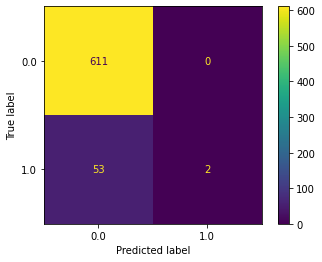

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))
